In [ ]:
!kaggle datasets download -d "msambare/fer2013"
!unzip fer2013.zip -d ./data/

Streaming output truncated to the last 5000 lines.
  inflating: ./data/train/sad/Training_65242339.jpg  
  inflating: ./data/train/sad/Training_65267116.jpg  
  inflating: ./data/train/sad/Training_65275626.jpg  
  inflating: ./data/train/sad/Training_6529266.jpg  
  inflating: ./data/train/sad/Training_65329617.jpg  
  inflating: ./data/train/sad/Training_65338712.jpg  
  inflating: ./data/train/sad/Training_65338797.jpg  
  inflating: ./data/train/sad/Training_65387162.jpg  
  inflating: ./data/train/sad/Training_65404494.jpg  
  inflating: ./data/train/sad/Training_65426218.jpg  
  inflating: ./data/train/sad/Training_65430136.jpg  
  inflating: ./data/train/sad/Training_65437377.jpg  
  inflating: ./data/train/sad/Training_6545735.jpg  
  inflating: ./data/train/sad/Training_65463385.jpg  
  inflating: ./data/train/sad/Training_65473985.jpg  
  inflating: ./data/train/sad/Training_65502829.jpg  
  inflating: ./data/train/sad/Training_65505359.jpg  
  inflating: ./data/train/sad/Tra

In [ ]:
import os
train= os.path.join('/content/data/train')
test= os.path.join('/content/data/test')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
IMG_HEIGHT=48
IMG_WIDTH = 48

In [ ]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
					train,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),

					class_mode='categorical',
					shuffle=True)

Found 28709 images belonging to 7 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
							test,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),

							class_mode='categorical',
							shuffle=True)

Found 7178 images belonging to 7 classes.


In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [ ]:
img, label = train_generator.__next__()

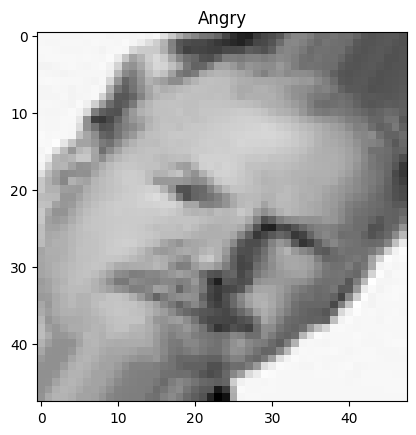

In [ ]:
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
model = Sequential([

 Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),

    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),

    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),

    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model1=model.fit(train_generator,epochs=40,callbacks=[early_stopping],validation_data=validation_generator,verbose=1)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.2353 - loss: 1.8362 - val_accuracy: 0.2615 - val_loss: 1.7673
Epoch 2/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.2643 - loss: 1.7723 - val_accuracy: 0.3157 - val_loss: 1.6899
Epoch 3/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.2943 - loss: 1.7309 - val_accuracy: 0.3927 - val_loss: 1.5910
Epoch 4/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.3297 - loss: 1.6802 - val_accuracy: 0.4015 - val_loss: 1.5623
Epoch 5/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.3560 - loss: 1.6345 - val_accuracy: 0.4248 - val_loss: 1.4882
Epoch 6/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.3728 - loss: 1.6028 - val_accuracy: 0.4446 - val_loss: 1.4395
Epoch 7/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.3855 - loss: 1.5741 - val_accuracy: 0.4716 - val_loss: 1.3966
Epoch 8/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.3927 - loss: 1.5577 - val_accurac

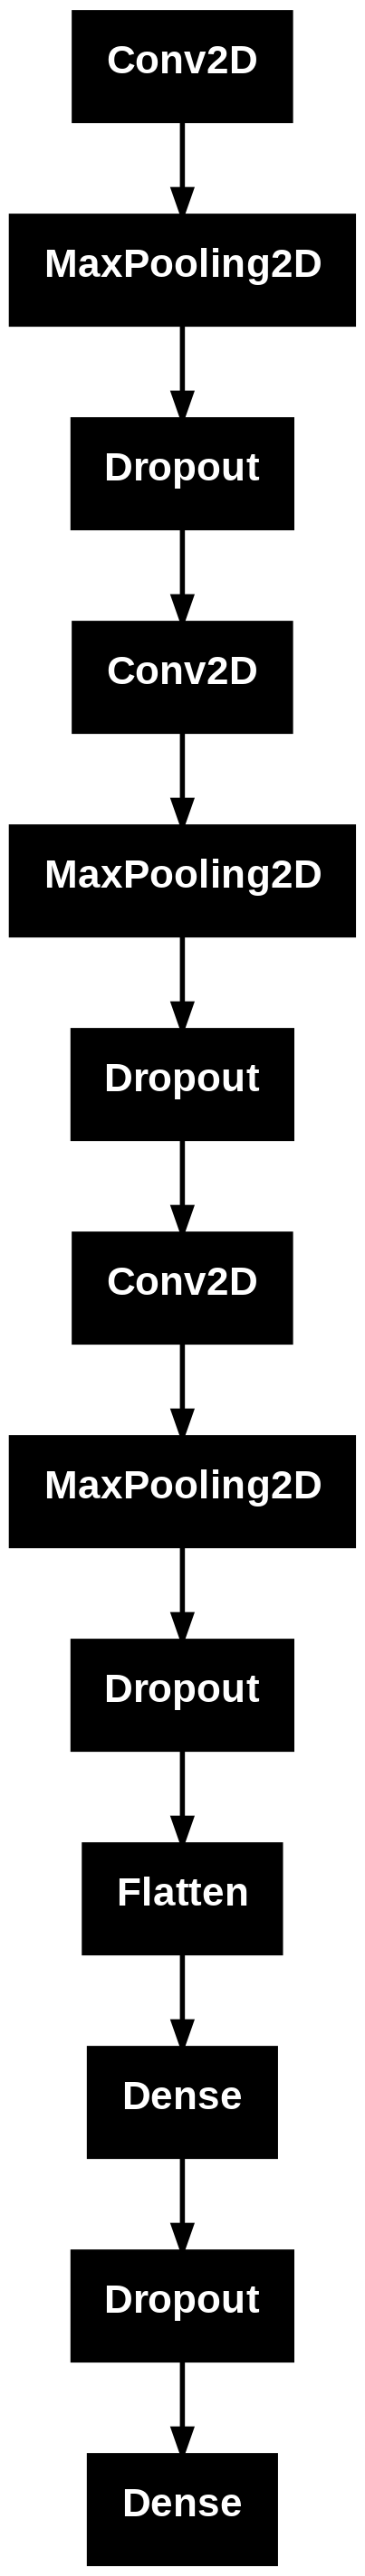

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
for i in range (len(model.layers)):
  if 'conv' in model.layers[i].name or 'dense' in model.layers[i].name:
    filters, biases = model.layers[i].get_weights()
    print('layer number', i, model.layers[i].name, filters.shape)
  else:
    print('layer number', i, model.layers[i].name, 'has no weights')

layer number 0 conv2d (3, 3, 1, 32)
layer number 1 max_pooling2d has no weights
layer number 2 dropout has no weights
layer number 3 conv2d_1 (3, 3, 32, 64)
layer number 4 max_pooling2d_1 has no weights
layer number 5 dropout_1 has no weights
layer number 6 conv2d_2 (3, 3, 64, 128)
layer number 7 max_pooling2d_2 has no weights
layer number 8 dropout_2 has no weights
layer number 9 flatten has no weights
layer number 10 dense (2048, 128)
layer number 11 dropout_3 has no weights
layer number 12 dense_1 (128, 7)


In [ ]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def plot_sample(image, true_label, predicted_label):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


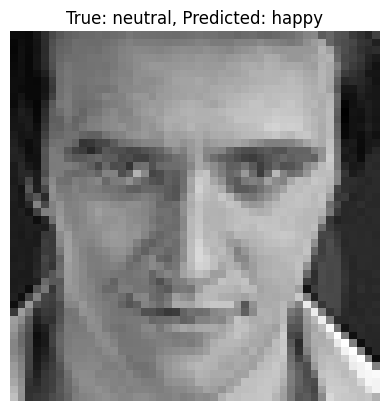

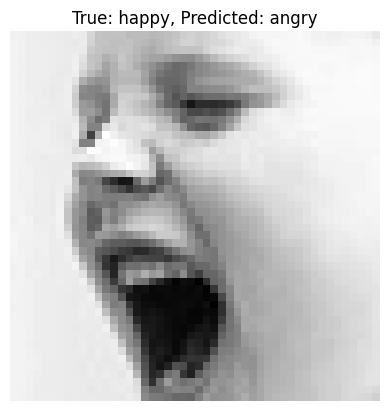

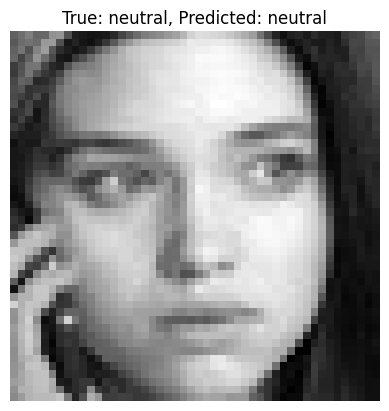

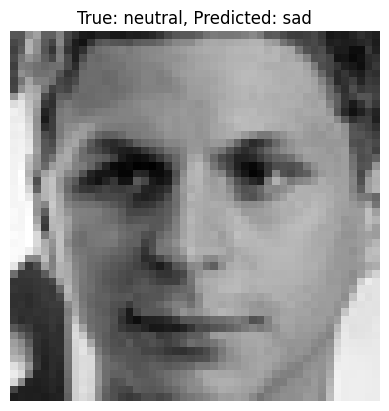

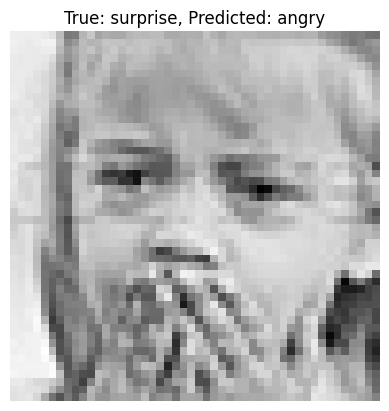

In [ ]:
image_batch, label_batch = next(validation_generator)
import tensorflow as tf
predictions = model.predict(image_batch)
for i in range(min(5, image_batch.shape[0])):
    plot_sample(image_batch[i], tf.argmax(label_batch[i]).numpy(), tf.argmax(predictions[i]).numpy())

In [ ]:
filters , bias = model.layers[0].get_weights()

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
import matplotlib.pyplot as pyplot

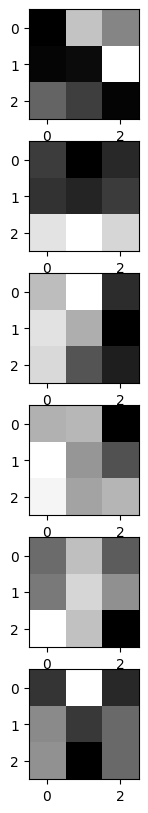

In [ ]:
n_filters = 6
ix = 1
fig = pyplot.figure(figsize=(15, 10))
for i in range(n_filters):

    f = filters[:, :, :, i]
    pyplot.subplot(n_filters, 1, ix)
    pyplot.imshow(f[:, :, 0], cmap='gray')
    ix += 1


pyplot.show()

In [ ]:
from tensorflow.keras.models import Model

model1 = Model(inputs=model.inputs, outputs=model.layers[0].output)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array,  ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


image = load_img("/content/data/test/fear/PrivateTest_10153550.jpg" , target_size=(48,48), color_mode='grayscale')


image = img_to_array(image)

image = np.expand_dims(image, axis=0)

image = preprocess_input(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 48, 48, 1))
  warnings.warn(msg)


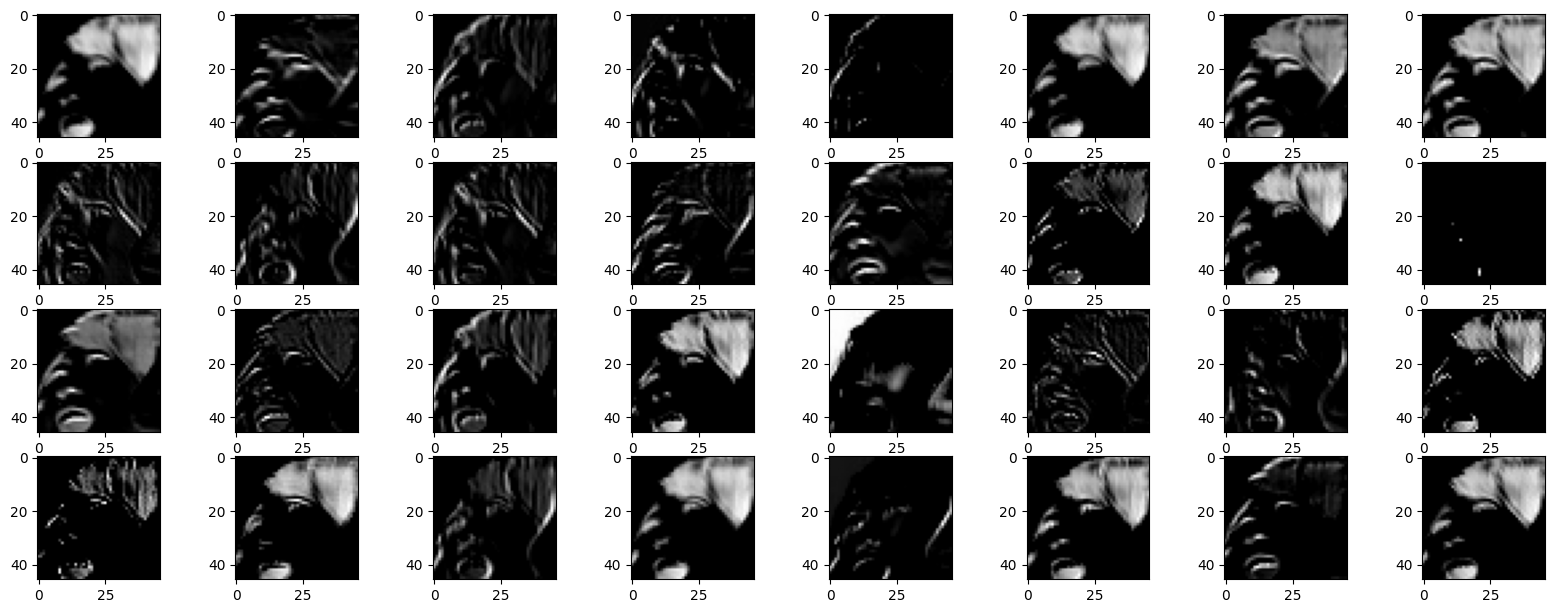

In [ ]:
features = model1.predict(image)

fig = pyplot.figure(figsize=(20, 15))

for i in range(features.shape[3]):
    pyplot.subplot(8, 8, i + 1)
    pyplot.imshow(features[0, :, :, i], cmap='gray')

pyplot.show()

In [ ]:
import tensorflow as tf

In [ ]:
mode2 = Sequential()

mode2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
mode2.add(MaxPooling2D(pool_size=(2, 2)))
mode2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
mode2.add(MaxPooling2D(pool_size=(2, 2)))
mode2.add(Dropout(0.1))

mode2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
mode2.add(MaxPooling2D(pool_size=(2, 2)))
mode2.add(Dropout(0.1))

mode2.add(Flatten())
mode2.add(Dense(512, activation='relu'))
mode2.add(Dropout(0.2))

mode2.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
mode2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
mode2.fit(train_generator,epochs=40,validation_data=validation_generator,callbacks=[early_stopping])

Epoch 1/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 31ms/step - accuracy: 0.2556 - loss: 1.8002 - val_accuracy: 0.3539 - val_loss: 1.6560
Epoch 2/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.3421 - loss: 1.6607 - val_accuracy: 0.4451 - val_loss: 1.4552
Epoch 3/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.4134 - loss: 1.5288 - val_accuracy: 0.4805 - val_loss: 1.3614
Epoch 4/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.4403 - loss: 1.4594 - val_accuracy: 0.4960 - val_loss: 1.3219
Epoch 5/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.4532 - loss: 1.4188 - val_accuracy: 0.5114 - val_loss: 1.2789
Epoch 6/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.4656 - loss: 1.3811 - val_accuracy: 0.5102 - val_loss: 1.2868
Epoch 7/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.4777 - loss: 1.3577 - val_accuracy: 0.5401 - val_loss: 1.2126
Epoch 8/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.4962 - loss: 1.3231 - 

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout, Conv2D
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
base_model.trainable = False
inputs = Input(shape=(48, 48, 1))

x = Conv2D(3, (3, 3), padding='same', activation='relu')(inputs)
x = base_model(x)

x = AveragePooling2D(2, 2)(x)
x = Flatten()(x)
outputs = Dense(7, activation='softmax')(x)

mobile = Model(inputs=inputs, outputs=outputs)
mobile.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobile.fit(train_generator, epochs=10, validation_data=validation_generator)

<ipython-input-39-e42a820ba366>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 48s 43ms/step - accuracy: 0.2410 - loss: 1.9658 - val_accuracy: 0.3121 - val_loss: 1.7833
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.3018 - loss: 1.7645 - val_accuracy: 0.3267 - val_loss: 1.7531
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3075 - loss: 1.7436 - val_accuracy: 0.3314 - val_loss: 1.7207
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.3165 - loss: 1.7346 - val_accuracy: 0.3289 - val_loss: 1.7004
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3195 - loss: 1.7167 - val_accuracy: 0.3335 - val_loss: 1.7046
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3198 - loss: 1.7171 - val_accuracy: 0.3292 - val_loss: 1.7259
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3202 - loss: 1.7109 - val_accuracy: 0.3410 - val_loss: 1.7096
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 4

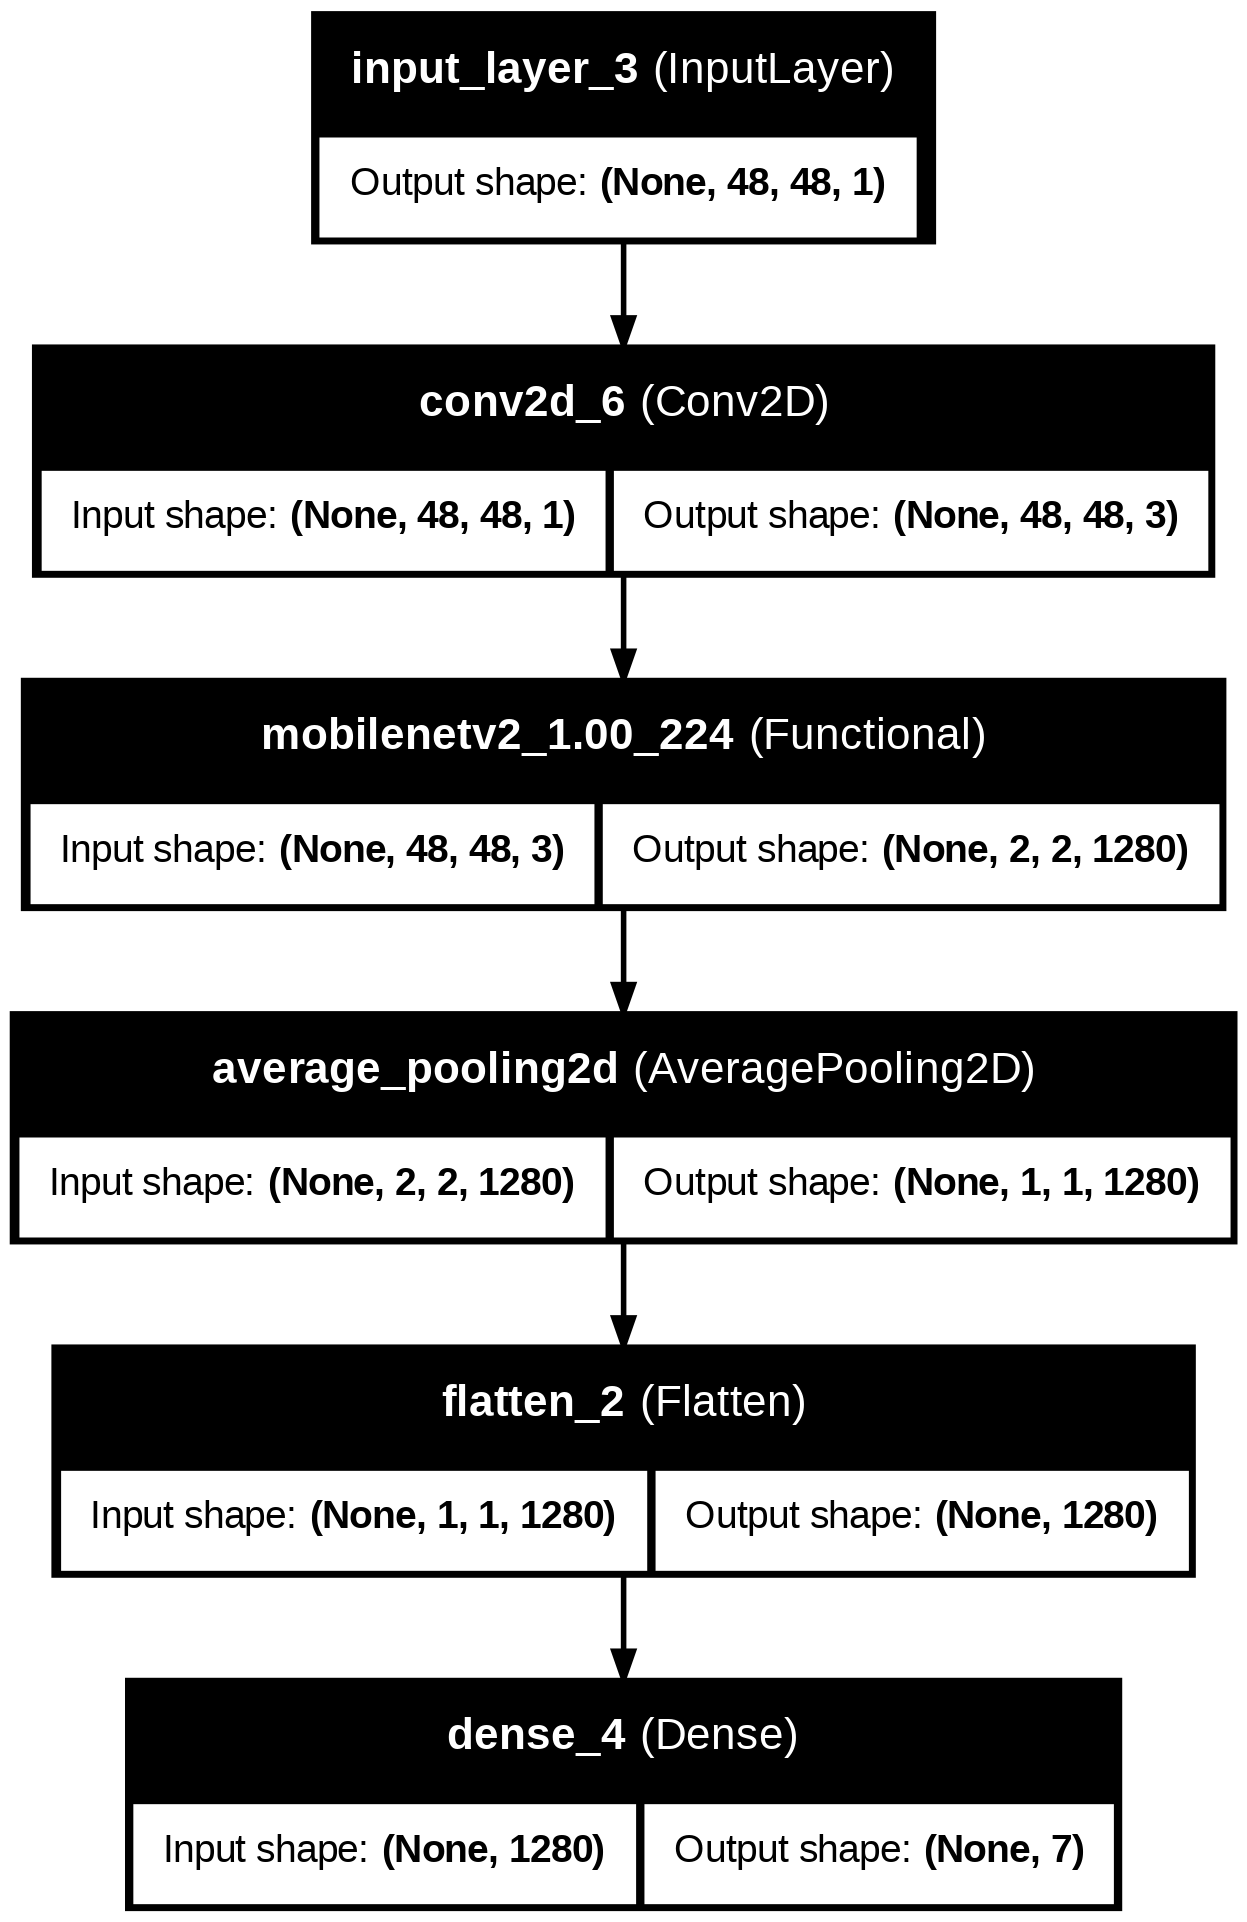

In [ ]:
from keras.utils import plot_model
plot_model(mobile, to_file='model.png', show_shapes=True, show_layer_names=True)